# Red wine quality prediction model

We need to generate the classification model that can predict the quality of red wine based on the given features.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

In [2]:
file_path = '../Data/winequality-red.csv'

In [3]:
df = pd.read_csv(file_path)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.duplicated().sum()

240

In [8]:
# Drop the duplicates
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(1359, 12)

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


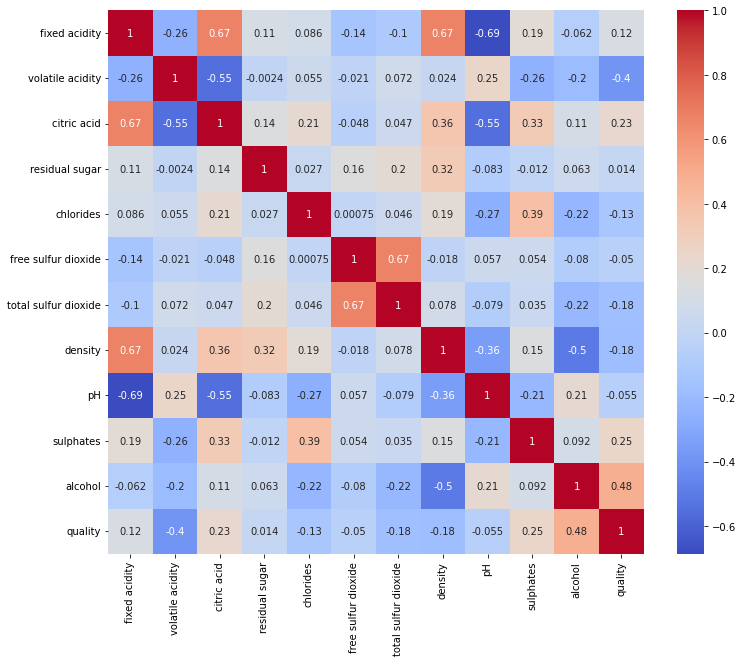

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

## Plot the columns against quality

In [16]:
col_names = df.columns[:-1]

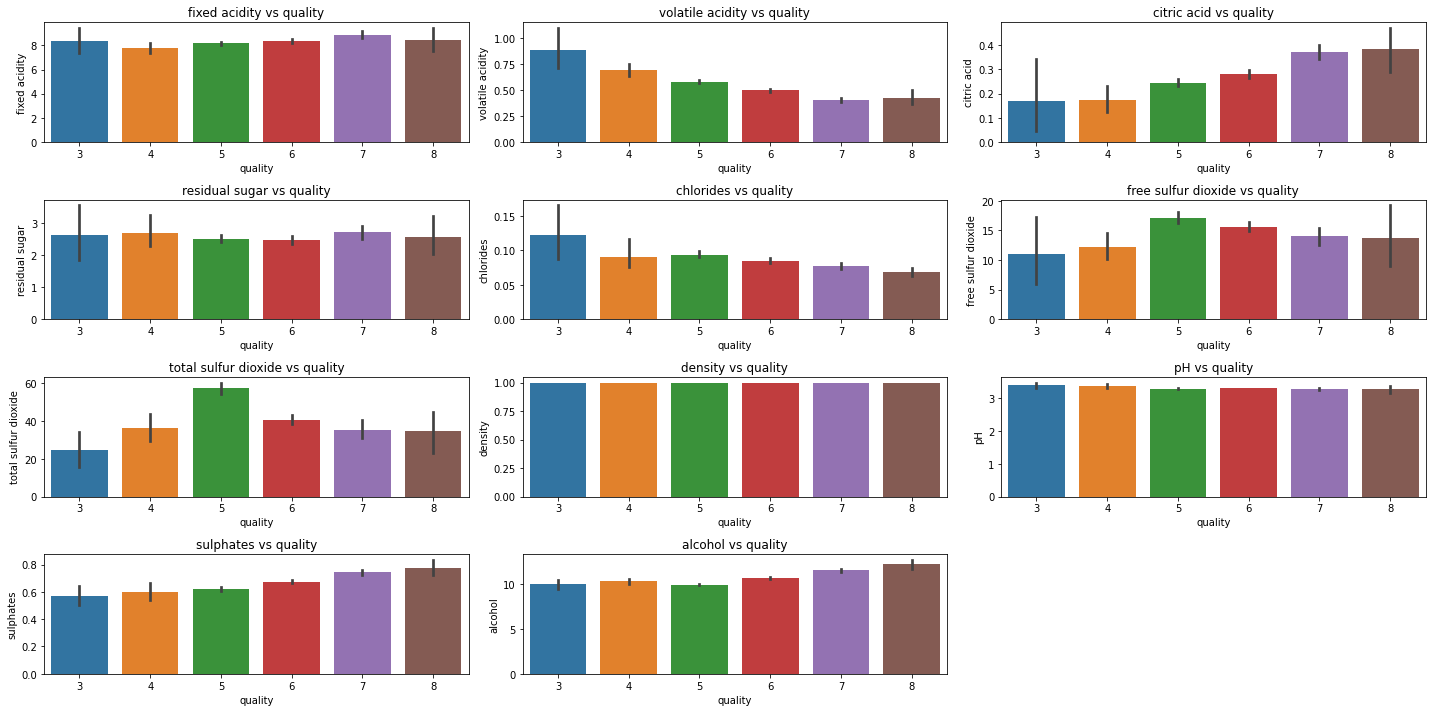

In [19]:
plt.figure(figsize=(20, 10))
for i, col_name in enumerate(col_names):
    plt.subplot(4, 3, i+1)

    sns.barplot(x='quality', y=col_name, data=df)
    plt.xlabel('quality')
    plt.ylabel(col_name)
    plt.title(f'{col_name} vs quality')

plt.tight_layout()
plt.show()

Observing the plots above, we can get rid of the following columns:
- fixed acidity
- residual sugar
- density
- pH

As these columns don't affect the quality much.

In [20]:
df_1 = df.drop(['fixed acidity', 'residual sugar', 'density', 'pH'], axis=1)
df_1.head()

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,0.70,0.00,0.076,11.0,34.0,0.56,9.4,5
1,0.88,0.00,0.098,25.0,67.0,0.68,9.8,5
2,0.76,0.04,0.092,15.0,54.0,0.65,9.8,5
3,0.28,0.56,0.075,17.0,60.0,0.58,9.8,6
5,0.66,0.00,0.075,13.0,40.0,0.56,9.4,5


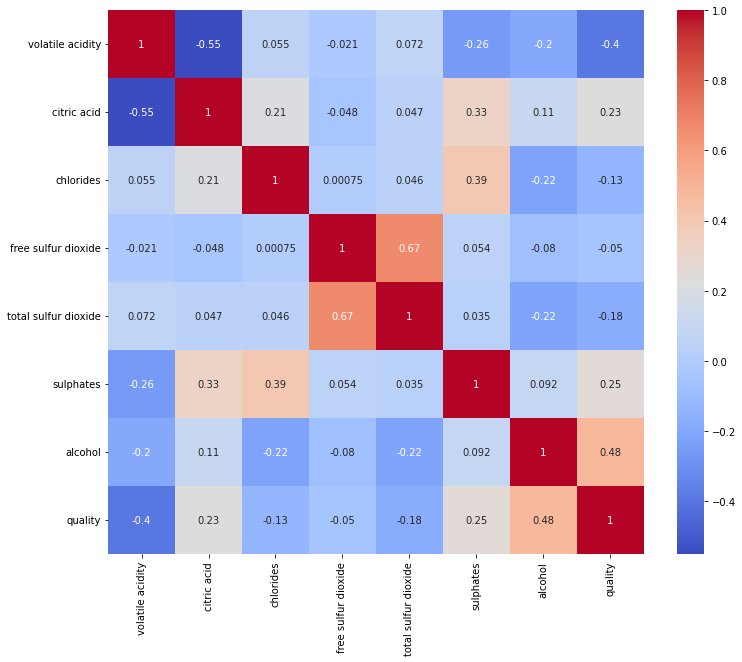

In [21]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_1.corr(), cmap='coolwarm', annot=True)
plt.show()

## Model building

In [22]:
X = df_1.drop('quality', axis=1)
y = df_1['quality'].values

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=41)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(1087, 7) (1087,)
(272, 7) (272,)


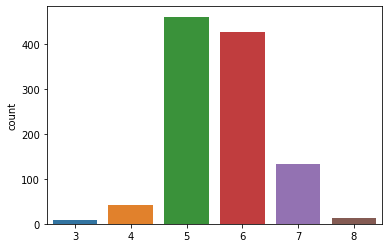

In [28]:
sns.countplot(x=y_train)
plt.show()

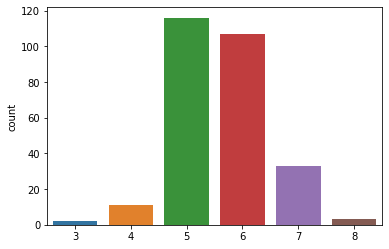

In [29]:
sns.countplot(x=y_val)
plt.show()

In [53]:
def process_model(model, model_name):
    scaler = StandardScaler()
    X_train_sc = scaler.fit_transform(X_train)
    X_val_sc = scaler.transform(X_val)
    with mlflow.start_run(run_name=model_name):
        model.fit(X_train_sc, y_train)

        preds = model.predict(X_val_sc)

        acc_score = accuracy_score(y_val, preds)
        pre_score = precision_score(y_val, preds, average='weighted', zero_division=0)
        rec_score = recall_score(y_val, preds, average='weighted', zero_division=0)
        conf_fig = ConfusionMatrixDisplay.from_predictions(y_val, preds).figure_

        print(f'{model_name} model:')
        print('  Accuracy :', acc_score)
        print('  Precision:', pre_score)
        print('  Recall   :', rec_score)

        mlflow.log_metric("Accuracy", acc_score)
        mlflow.log_metric("Precision", pre_score)
        mlflow.log_metric("Recall", rec_score)
        mlflow.log_figure(conf_fig, "conf_matrix.png")
        

        mlflow.sklearn.log_model(model, "model")

LogReg model:
  Accuracy : 0.5882352941176471
  Precision: 0.566612776866499
  Recall   : 0.5882352941176471


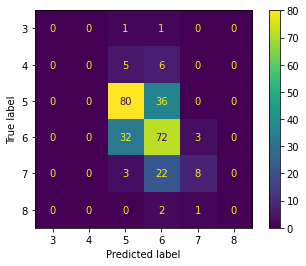

In [54]:
process_model(model=LogisticRegression(), model_name='LogReg')

LogReg (One-vs-Rest) model:
  Accuracy : 0.5772058823529411
  Precision: 0.5579277544351073
  Recall   : 0.5772058823529411


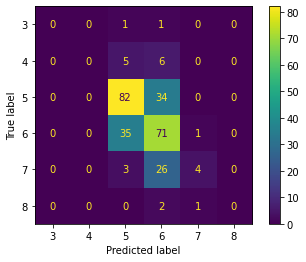

In [55]:
process_model(model=LogisticRegression(multi_class='ovr', solver='liblinear'), model_name='LogReg (One-vs-Rest)')

NaiveBayes_Gaussian model:
  Accuracy : 0.5367647058823529
  Precision: 0.5453009280337522
  Recall   : 0.5367647058823529


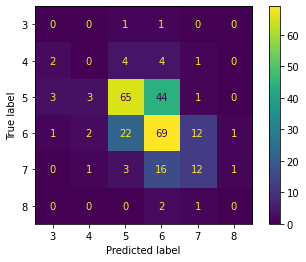

In [56]:
process_model(model=GaussianNB(), model_name='NaiveBayes_Gaussian')

RandFor model:
  Accuracy : 0.5882352941176471
  Precision: 0.556797435976425
  Recall   : 0.5882352941176471


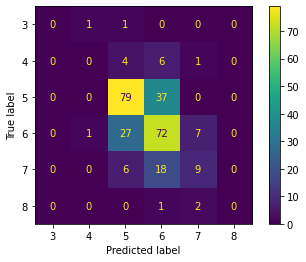

In [57]:
process_model(model=RandomForestClassifier(), model_name='RandFor')